In [1]:
#import libraries:

import numpy as np
import pandas as pd
import pandas_profiling
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv("train.csv")

In [3]:
train_df.shape

(1460, 81)

In [4]:
#train_df.profile_report()

In [5]:
train_df.drop(['Alley','PoolQC','MiscFeature','Fence'],axis=1,inplace=True)

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

<IPython.core.display.Javascript object>


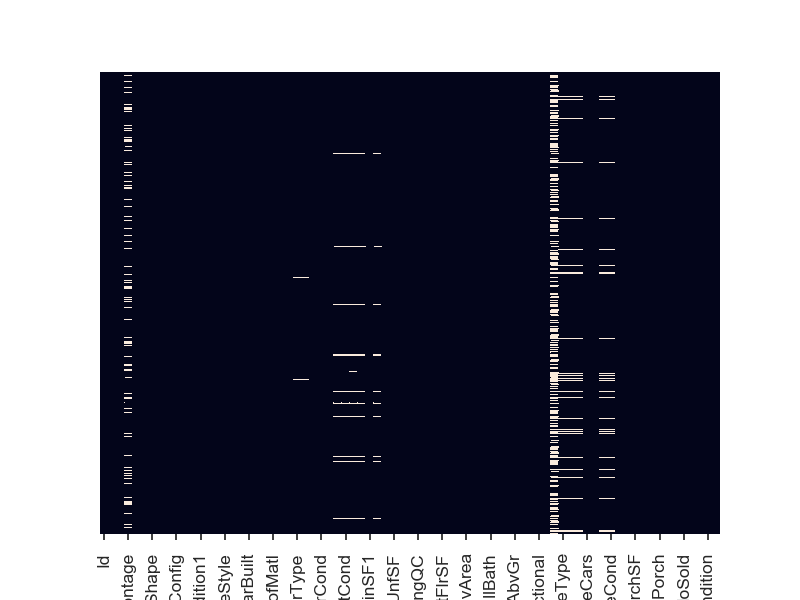

In [7]:
sns.heatmap(train_df.isnull(),yticklabels=False,cbar=False)

In [8]:
train_df.drop(['FireplaceQu'],axis=1,inplace=True)

In [9]:
train_df['GarageYrBlt'] = train_df['GarageYrBlt'].fillna(train_df['GarageYrBlt'].mean())

In [10]:
train_df['LotFrontage']=train_df['LotFrontage'].fillna(train_df['LotFrontage'].mean())
train_df['BsmtCond']=train_df['BsmtCond'].fillna(train_df['BsmtCond'].mode()[0])
train_df['BsmtQual']=train_df['BsmtQual'].fillna(train_df['BsmtQual'].mode()[0])
train_df['GarageType']=train_df['GarageType'].fillna(train_df['GarageType'].mode()[0])
train_df['GarageFinish']=train_df['GarageFinish'].fillna(train_df['GarageFinish'].mode()[0])
train_df['GarageQual']=train_df['GarageQual'].fillna(train_df['GarageQual'].mode()[0])
train_df['GarageCond']=train_df['GarageCond'].fillna(train_df['GarageCond'].mode()[0])

In [11]:
train_df['MasVnrType']=train_df['MasVnrType'].fillna(train_df['MasVnrType'].mode()[0])
train_df['MasVnrArea']=train_df['MasVnrArea'].fillna(train_df['MasVnrArea'].mode()[0])
train_df['BsmtExposure']=train_df['BsmtExposure'].fillna(train_df['BsmtExposure'].mode()[0])
train_df['BsmtFinType2']=train_df['BsmtFinType2'].fillna(train_df['BsmtFinType2'].mode()[0])

In [12]:
train_df['BsmtFinType1']=train_df['BsmtFinType1'].fillna(train_df['BsmtFinType1'].mode()[0])

In [13]:
train_df['Electrical']=train_df['Electrical'].fillna(train_df['Electrical'].mode()[0])

In [14]:
train_df.shape

(1460, 76)

In [15]:
columns=['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
         'Condition2','BldgType','Condition1','HouseStyle','SaleType',
        'SaleCondition','ExterCond',
         'ExterQual','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
        'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Heating','HeatingQC',
         'CentralAir',
         'Electrical','KitchenQual','Functional',
         'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive']

In [16]:
def category_onehot_multcols(multcolumns):
    df_final=final_df
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([final_df,df_final],axis=1)
        
    return df_final

In [17]:
main_df=train_df.copy()

In [18]:
## Combine Test Data 

test_df=pd.read_csv('formulatedtest.csv')

In [19]:
final_df=pd.concat([train_df,test_df],axis=0)

In [20]:
final_df['SalePrice']

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1454         NaN
1455         NaN
1456         NaN
1457         NaN
1458         NaN
Name: SalePrice, Length: 2919, dtype: float64

In [21]:
final_df.shape

(2919, 77)

In [22]:
final_df=category_onehot_multcols(columns)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition2
BldgType
Condition1
HouseStyle
SaleType
SaleCondition
ExterCond
ExterQual
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive


In [23]:
final_df.shape

(2919, 238)

In [24]:
final_df =final_df.loc[:,~final_df.columns.duplicated()]

In [25]:
final_df.shape

(2919, 178)

In [26]:
final_df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,...,0,0,1,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,...,0,0,1,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486.0,...,0,0,1,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216.0,...,0,0,1,0,0,0,0,1,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655.0,...,0,0,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,21.0,1936,4,7,1970,1970,0.0,0.0,...,0,0,1,1,0,0,0,0,0,0
1455,2916,160,21.0,1894,4,5,1970,1970,0.0,252.0,...,0,0,1,0,0,0,1,0,0,0
1456,2917,20,160.0,20000,5,7,1960,1996,0.0,1224.0,...,0,0,1,0,0,0,0,1,0,0
1457,2918,85,62.0,10441,5,5,1992,1992,0.0,337.0,...,0,0,1,1,0,0,0,0,0,0


In [27]:
df_Train=final_df.iloc[:1460,:]
df_Test=final_df.iloc[1460:,:]

In [28]:
df_Train.shape

(1460, 178)

In [29]:
df_Test['Id']

0       1461
1       1462
2       1463
3       1464
4       1465
        ... 
1454    2915
1455    2916
1456    2917
1457    2918
1458    2919
Name: Id, Length: 1459, dtype: int64

In [30]:
df_Test = df_Test.drop(['SalePrice'],axis=1)

In [31]:
X_train=df_Train.drop(['SalePrice'],axis=1)
y_train=df_Train['SalePrice']

In [32]:
import xgboost
regressor=xgboost.XGBRegressor()

In [33]:
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]

In [34]:
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [36]:
# Set up the random search with 4-fold cross validation
from sklearn.model_selection import RandomizedSearchCV
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [37]:
random_cv.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   15.1s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  2.8min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  6.5min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:  9.6min finished


[22:23:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_state=0, reg_alpha=...
                   iid='deprecated', n_iter=50, n_jobs=4,
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 1],
                                        'booster': ['g

In [38]:
random_cv.best_estimator_

XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=None, n_estimators=900,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [39]:
regressor=xgboost.XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=None, n_estimators=900,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [40]:
regressor.fit(X_train,y_train)

[22:24:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=None, n_estimators=900,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [42]:
import pickle
filename = 'finalized_model.pkl'
pickle.dump(regressor, open(filename, 'wb'))

In [44]:
df_Test.shape

(1459, 177)

In [46]:
y_pred=regressor.predict(df_Test)

In [54]:
y_pred

array([123435.88, 161721.92, 184340.3 , ..., 179532.27, 117466.28,
       233489.22], dtype=float32)

In [51]:
pred=pd.DataFrame(y_pred)
sub_df=pd.read_csv('sample_submission.csv')
datasets=pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns=['Id','SalePrice']
datasets.to_csv('sample_submission.csv',index=False)

In [55]:
pred.columns=['SalePrice']

In [56]:
temp_df=df_Train['SalePrice'].copy()

In [57]:
temp_df.column=['SalePrice']

In [58]:
df_Train.drop(['SalePrice'],axis=1,inplace=True)

C:\Users\hgoya\Anaconda3\lib\site-packages\pandas\core\frame.py:3994: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [59]:
df_Train=pd.concat([df_Train,temp_df],axis=1)

In [60]:
df_Test=pd.concat([df_Test,pred],axis=1)

In [61]:
df_Train=pd.concat([df_Train,df_Test],axis=0)

In [62]:
X_train=df_Train.drop(['SalePrice'],axis=1)
y_train=df_Train['SalePrice']

In [64]:
from keras import backend as K
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [66]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout


# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 50, init = 'he_uniform',activation='relu',input_dim = 177))

# Adding the second hidden layer
classifier.add(Dense(output_dim = 25, init = 'he_uniform',activation='relu'))

# Adding the third hidden layer
classifier.add(Dense(output_dim = 50, init = 'he_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'he_uniform'))

# Compiling the ANN
classifier.compile(loss=root_mean_squared_error, optimizer='Adamax')

# Fitting the ANN to the Training set
model_history=classifier.fit(X_train.values, y_train.values,validation_split=0.20, batch_size = 10, nb_epoch = 1000)

C:\Users\hgoya\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=177, units=50, kernel_initializer="he_uniform")`
  del sys.path[0]
C:\Users\hgoya\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=25, kernel_initializer="he_uniform")`
  app.launch_new_instance()
C:\Users\hgoya\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=50, kernel_initializer="he_uniform")`
C:\Users\hgoya\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1, kernel_initializer="he_uniform")`
C:\Users\hgoya\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 2335 samples, validate on 584 samples
Epoch 1/1000
2335/2335 [==============================] - 1s 641us/step - loss: 104183.0723 - val_loss: 54466.3087
Epoch 2/1000
2335/2335 [==============================] - 0s 156us/step - loss: 61849.9811 - val_loss: 49536.4983
Epoch 3/1000
2335/2335 [==============================] - 0s 152us/step - loss: 56024.5412 - val_loss: 48611.3584
Epoch 4/1000
2335/2335 [==============================] - 0s 139us/step - loss: 50311.5245 - val_loss: 40092.8669
Epoch 5/1000
2335/2335 [==============================] - 0s 165us/step - loss: 44706.8359 - val_loss: 34679.8861
Epoch 6/1000
2335/2335 [==============================] - 0s 151us/step - loss: 39860.2251 - val_loss: 32631.1197
Epoch 7/1000
2335/2335 [==============================] - 0s 150us/step - loss: 37674.8811 - val_loss: 32188.8379
Epoch 8/1000
2335/2335 [==============================] - 0s 166us/step - loss: 36567.3139 - val_loss: 32009.4685
Epoch 9/1000
2335/2335 [================

Epoch 72/1000
2335/2335 [==============================] - 0s 189us/step - loss: 31093.7067 - val_loss: 29046.1074
Epoch 73/1000
2335/2335 [==============================] - 0s 164us/step - loss: 30851.1488 - val_loss: 28251.6647
Epoch 74/1000
2335/2335 [==============================] - 0s 144us/step - loss: 30776.8812 - val_loss: 28756.6448
Epoch 75/1000
2335/2335 [==============================] - 0s 159us/step - loss: 30426.2689 - val_loss: 29348.2615
Epoch 76/1000
2335/2335 [==============================] - 0s 133us/step - loss: 30889.9645 - val_loss: 28751.2761
Epoch 77/1000
2335/2335 [==============================] - ETA: 0s - loss: 30469.711 - 0s 150us/step - loss: 30539.3158 - val_loss: 28474.6870
Epoch 78/1000
2335/2335 [==============================] - 0s 150us/step - loss: 30270.4090 - val_loss: 29249.7280
Epoch 79/1000
2335/2335 [==============================] - 0s 143us/step - loss: 30076.6342 - val_loss: 27789.7539
Epoch 80/1000
2335/2335 [===========================

2335/2335 [==============================] - 0s 170us/step - loss: 24640.1355 - val_loss: 21646.1473
Epoch 143/1000
2335/2335 [==============================] - 0s 143us/step - loss: 24922.3187 - val_loss: 21805.9809
Epoch 144/1000
2335/2335 [==============================] - 0s 157us/step - loss: 25004.2701 - val_loss: 22094.5376
Epoch 145/1000
2335/2335 [==============================] - 0s 157us/step - loss: 24629.8181 - val_loss: 21188.5441
Epoch 146/1000
2335/2335 [==============================] - 0s 136us/step - loss: 25264.8591 - val_loss: 21253.0459
Epoch 147/1000
2335/2335 [==============================] - 0s 149us/step - loss: 24546.6958 - val_loss: 24937.2063
Epoch 148/1000
2335/2335 [==============================] - 0s 158us/step - loss: 24922.0378 - val_loss: 20964.9552
Epoch 149/1000
2335/2335 [==============================] - 0s 147us/step - loss: 24487.0839 - val_loss: 21122.8641
Epoch 150/1000
2335/2335 [==============================] - 0s 144us/step - loss: 24615

Epoch 213/1000
2335/2335 [==============================] - 0s 148us/step - loss: 22313.1689 - val_loss: 19735.9576
Epoch 214/1000
2335/2335 [==============================] - 0s 158us/step - loss: 22380.1793 - val_loss: 19507.8731
Epoch 215/1000
2335/2335 [==============================] - 0s 145us/step - loss: 22247.1349 - val_loss: 18793.0564
Epoch 216/1000
2335/2335 [==============================] - 0s 139us/step - loss: 22375.1663 - val_loss: 17822.6406
Epoch 217/1000
2335/2335 [==============================] - 0s 157us/step - loss: 21889.1012 - val_loss: 19684.5136
Epoch 218/1000
2335/2335 [==============================] - 0s 143us/step - loss: 22214.1601 - val_loss: 19831.2086
Epoch 219/1000
2335/2335 [==============================] - 0s 143us/step - loss: 22172.2562 - val_loss: 17471.3204
Epoch 220/1000
2335/2335 [==============================] - 0s 164us/step - loss: 21905.5078 - val_loss: 17808.4695
Epoch 221/1000
2335/2335 [==============================] - 0s 136us/ste

2335/2335 [==============================] - 0s 149us/step - loss: 20252.5685 - val_loss: 15662.7035
Epoch 284/1000
2335/2335 [==============================] - 0s 169us/step - loss: 20175.3164 - val_loss: 20452.9802
Epoch 285/1000
2335/2335 [==============================] - 0s 138us/step - loss: 20212.5322 - val_loss: 16564.2201
Epoch 286/1000
2335/2335 [==============================] - 0s 142us/step - loss: 20007.6201 - val_loss: 15926.1189
Epoch 287/1000
2335/2335 [==============================] - 0s 157us/step - loss: 20286.6164 - val_loss: 15717.9294
Epoch 288/1000
2335/2335 [==============================] - 0s 143us/step - loss: 19854.9820 - val_loss: 16256.6871
Epoch 289/1000
2335/2335 [==============================] - 0s 143us/step - loss: 20059.7847 - val_loss: 15284.8537
Epoch 290/1000
2335/2335 [==============================] - 0s 157us/step - loss: 19347.5812 - val_loss: 15594.1394
Epoch 291/1000
2335/2335 [==============================] - 0s 141us/step - loss: 19873

Epoch 354/1000
2335/2335 [==============================] - 0s 136us/step - loss: 18685.3581 - val_loss: 14033.9517
Epoch 355/1000
2335/2335 [==============================] - 0s 161us/step - loss: 18557.3335 - val_loss: 14036.2630
Epoch 356/1000
2335/2335 [==============================] - 0s 151us/step - loss: 17939.9023 - val_loss: 14386.9258
Epoch 357/1000
2335/2335 [==============================] - 0s 165us/step - loss: 18576.7141 - val_loss: 13861.0862
Epoch 358/1000
2335/2335 [==============================] - 0s 171us/step - loss: 18503.3164 - val_loss: 16163.3122
Epoch 359/1000
2335/2335 [==============================] - 0s 143us/step - loss: 18800.1746 - val_loss: 14783.9769
Epoch 360/1000
2335/2335 [==============================] - 0s 152us/step - loss: 18610.8581 - val_loss: 19619.8199
Epoch 361/1000
2335/2335 [==============================] - 0s 155us/step - loss: 18228.0142 - val_loss: 22645.5360
Epoch 362/1000
2335/2335 [==============================] - 0s 136us/ste

2335/2335 [==============================] - 0s 200us/step - loss: 17590.4431 - val_loss: 17201.1312
Epoch 425/1000
2335/2335 [==============================] - 0s 164us/step - loss: 17975.3686 - val_loss: 15214.3591
Epoch 426/1000
2335/2335 [==============================] - 0s 152us/step - loss: 17083.5503 - val_loss: 15870.2368
Epoch 427/1000
2335/2335 [==============================] - 0s 163us/step - loss: 17395.7336 - val_loss: 16432.4720
Epoch 428/1000
2335/2335 [==============================] - 0s 146us/step - loss: 18294.3345 - val_loss: 12454.6424
Epoch 429/1000
2335/2335 [==============================] - 0s 152us/step - loss: 17557.1510 - val_loss: 12531.8523
Epoch 430/1000
2335/2335 [==============================] - 0s 156us/step - loss: 18137.7184 - val_loss: 15478.1089
Epoch 431/1000
2335/2335 [==============================] - 0s 142us/step - loss: 17332.1179 - val_loss: 13277.1341
Epoch 432/1000
2335/2335 [==============================] - 0s 156us/step - loss: 17227

2335/2335 [==============================] - 0s 142us/step - loss: 16613.6117 - val_loss: 13296.3158
Epoch 495/1000
2335/2335 [==============================] - 0s 155us/step - loss: 17060.4723 - val_loss: 12484.7360
Epoch 496/1000
2335/2335 [==============================] - 0s 153us/step - loss: 16993.4390 - val_loss: 18279.3268
Epoch 497/1000
2335/2335 [==============================] - 0s 140us/step - loss: 17023.2054 - val_loss: 11937.2083
Epoch 498/1000
2335/2335 [==============================] - 0s 154us/step - loss: 16929.6567 - val_loss: 12659.9845
Epoch 499/1000
2335/2335 [==============================] - 0s 153us/step - loss: 16617.3942 - val_loss: 16467.1810
Epoch 500/1000
2335/2335 [==============================] - 0s 143us/step - loss: 16827.5919 - val_loss: 16108.2486
Epoch 501/1000
2335/2335 [==============================] - 0s 160us/step - loss: 17667.7796 - val_loss: 12445.2777
Epoch 502/1000
2335/2335 [==============================] - 0s 153us/step - loss: 16552

Epoch 565/1000
2335/2335 [==============================] - 0s 149us/step - loss: 16022.8705 - val_loss: 11895.4877
Epoch 566/1000
2335/2335 [==============================] - 0s 154us/step - loss: 16136.2906 - val_loss: 16551.8694
Epoch 567/1000
2335/2335 [==============================] - 0s 138us/step - loss: 16680.4173 - val_loss: 12884.5004
Epoch 568/1000
2335/2335 [==============================] - 0s 142us/step - loss: 16049.9597 - val_loss: 12092.2367
Epoch 569/1000
2335/2335 [==============================] - 0s 157us/step - loss: 16389.7087 - val_loss: 14466.1648
Epoch 570/1000
2335/2335 [==============================] - 0s 142us/step - loss: 16218.0992 - val_loss: 12294.7626
Epoch 571/1000
2335/2335 [==============================] - 0s 153us/step - loss: 16490.7197 - val_loss: 13173.3404
Epoch 572/1000
2335/2335 [==============================] - 0s 139us/step - loss: 16039.6909 - val_loss: 11668.1659
Epoch 573/1000
2335/2335 [==============================] - 0s 160us/ste

2335/2335 [==============================] - 0s 155us/step - loss: 16157.4570 - val_loss: 12993.9887
Epoch 636/1000
2335/2335 [==============================] - 0s 137us/step - loss: 15488.1656 - val_loss: 11759.1456
Epoch 637/1000
2335/2335 [==============================] - 0s 159us/step - loss: 15737.0872 - val_loss: 11777.2278
Epoch 638/1000
2335/2335 [==============================] - 0s 146us/step - loss: 15692.0273 - val_loss: 13987.1195
Epoch 639/1000
2335/2335 [==============================] - 0s 148us/step - loss: 15768.6416 - val_loss: 12175.8052
Epoch 640/1000
2335/2335 [==============================] - 0s 154us/step - loss: 16069.9469 - val_loss: 12114.8085
Epoch 641/1000
2335/2335 [==============================] - 0s 147us/step - loss: 15672.0536 - val_loss: 12148.5362
Epoch 642/1000
2335/2335 [==============================] - 0s 152us/step - loss: 15428.6909 - val_loss: 12237.7282
Epoch 643/1000
2335/2335 [==============================] - 0s 153us/step - loss: 15463

Epoch 706/1000
2335/2335 [==============================] - 0s 156us/step - loss: 15291.0520 - val_loss: 13223.7427
Epoch 707/1000
2335/2335 [==============================] - 0s 152us/step - loss: 15604.5267 - val_loss: 11578.5967
Epoch 708/1000
2335/2335 [==============================] - 0s 141us/step - loss: 15010.2570 - val_loss: 13235.0380
Epoch 709/1000
2335/2335 [==============================] - 0s 154us/step - loss: 15369.2922 - val_loss: 12404.5600
Epoch 710/1000
2335/2335 [==============================] - 0s 149us/step - loss: 15153.2968 - val_loss: 14090.9282
Epoch 711/1000
2335/2335 [==============================] - 0s 139us/step - loss: 15631.0108 - val_loss: 13160.9126
Epoch 712/1000
2335/2335 [==============================] - 0s 153us/step - loss: 14954.5099 - val_loss: 13045.4363
Epoch 713/1000
2335/2335 [==============================] - 0s 151us/step - loss: 15807.0839 - val_loss: 12075.6124
Epoch 714/1000
2335/2335 [==============================] - 0s 137us/ste

2335/2335 [==============================] - 0s 141us/step - loss: 14837.1467 - val_loss: 12736.1071
Epoch 777/1000
2335/2335 [==============================] - 0s 153us/step - loss: 14772.6892 - val_loss: 12397.7169
Epoch 778/1000
2335/2335 [==============================] - 0s 139us/step - loss: 14454.3329 - val_loss: 13936.3620
Epoch 779/1000
2335/2335 [==============================] - 0s 143us/step - loss: 14697.8275 - val_loss: 11745.3628
Epoch 780/1000
2335/2335 [==============================] - 0s 160us/step - loss: 15037.0995 - val_loss: 12449.6690
Epoch 781/1000
2335/2335 [==============================] - 0s 145us/step - loss: 14442.7660 - val_loss: 11845.5881
Epoch 782/1000
2335/2335 [==============================] - 0s 137us/step - loss: 15043.2891 - val_loss: 12438.0957
Epoch 783/1000
2335/2335 [==============================] - 0s 150us/step - loss: 14935.5646 - val_loss: 12914.3916
Epoch 784/1000
2335/2335 [==============================] - 0s 154us/step - loss: 14053

Epoch 847/1000
2335/2335 [==============================] - 0s 143us/step - loss: 14377.1753 - val_loss: 13100.7781
Epoch 848/1000
2335/2335 [==============================] - 0s 153us/step - loss: 14397.8502 - val_loss: 15051.5986
Epoch 849/1000
2335/2335 [==============================] - 0s 138us/step - loss: 14410.4359 - val_loss: 12430.8279
Epoch 850/1000
2335/2335 [==============================] - 0s 149us/step - loss: 14263.4636 - val_loss: 12227.8370
Epoch 851/1000
2335/2335 [==============================] - 0s 157us/step - loss: 14526.5383 - val_loss: 12169.6538
Epoch 852/1000
2335/2335 [==============================] - 0s 143us/step - loss: 14148.6990 - val_loss: 12256.8855
Epoch 853/1000
2335/2335 [==============================] - 0s 156us/step - loss: 14793.6046 - val_loss: 12480.9570
Epoch 854/1000
2335/2335 [==============================] - 0s 158us/step - loss: 13986.1963 - val_loss: 11633.6933
Epoch 855/1000
2335/2335 [==============================] - 0s 151us/ste

2335/2335 [==============================] - 0s 157us/step - loss: 13896.0421 - val_loss: 13098.7957
Epoch 918/1000
2335/2335 [==============================] - 0s 136us/step - loss: 14282.4115 - val_loss: 16813.1430
Epoch 919/1000
2335/2335 [==============================] - 0s 164us/step - loss: 13790.6988 - val_loss: 14511.3324
Epoch 920/1000
2335/2335 [==============================] - 0s 143us/step - loss: 13762.6831 - val_loss: 13791.3197
Epoch 921/1000
2335/2335 [==============================] - 0s 136us/step - loss: 13695.7404 - val_loss: 13639.7474
Epoch 922/1000
2335/2335 [==============================] - 0s 149us/step - loss: 14603.2302 - val_loss: 11916.6291
Epoch 923/1000
2335/2335 [==============================] - 0s 150us/step - loss: 13761.1678 - val_loss: 13244.2302
Epoch 924/1000
2335/2335 [==============================] - 0s 158us/step - loss: 13705.0686 - val_loss: 11779.4797
Epoch 925/1000
2335/2335 [==============================] - 0s 141us/step - loss: 13732

Epoch 988/1000
2335/2335 [==============================] - 0s 143us/step - loss: 13589.4215 - val_loss: 12458.3727
Epoch 989/1000
2335/2335 [==============================] - 0s 136us/step - loss: 13987.5981 - val_loss: 13296.7751
Epoch 990/1000
2335/2335 [==============================] - 0s 157us/step - loss: 13775.5600 - val_loss: 14160.4626
Epoch 991/1000
2335/2335 [==============================] - 0s 149us/step - loss: 14254.8375 - val_loss: 12975.2097
Epoch 992/1000
2335/2335 [==============================] - 0s 149us/step - loss: 13792.3917 - val_loss: 12074.0515
Epoch 993/1000
2335/2335 [==============================] - 0s 158us/step - loss: 13289.3744 - val_loss: 12341.8748
Epoch 994/1000
2335/2335 [==============================] - 0s 143us/step - loss: 13967.1518 - val_loss: 13163.5748
Epoch 995/1000
2335/2335 [==============================] - 0s 157us/step - loss: 14214.5095 - val_loss: 11773.9065
Epoch 996/1000
2335/2335 [==============================] - 0s 142us/ste

In [67]:
ann_pred=classifier.predict(df_Test.drop(['SalePrice'],axis=1).values)

In [69]:
##Create Sample Submission file and Submit using ANN
pred=pd.DataFrame(ann_pred)
sub_df=pd.read_csv('sample_submission.csv')
datasets=pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns=['Id','SalePrice']
datasets.to_csv('sample_submission.csv',index=False)

In [ ]:
import pickle
filename = 'finalized_model2.pkl'
pickle.dump(model_history, open(filename, 'wb'))